<h1>Brief IMDB<h1>

<h2>Auteurs : Kévin Heugas & Thierry Massart<h2>

<h2>Date : 04/2024 (S15)<h2>

[Lien vers Simplonline : Prédiction de note IMDB de film](https://simplonline.co/briefs/53911d01-6ba4-4ad6-90e0-daf34da67ec2)

<h3>1. Importation, exploration/analyse, nettoyage et enregistrement du DataSet<h3>

<h4>1.1. Importation<h4>

In [1]:
# Importation des librairies python
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import joblib
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_squared_log_error

In [2]:
# Chargement des données IMDB
df = pd.read_csv("5000_movies_bis.csv")

<h4>1.2. Exploration/analyse<h4>

In [3]:
# Affichage des premières lignes du DataFrame pour comprendre sa structure
pd.set_option('display.max_columns', None)
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_fb_likes  actor_3_fb_likes      actor_2_name  actor_1_fb_likes  \
0                0.0             855.0  Joel David Moore            1000.0   
1              563.0            1000.0     Orlando Bloom           40000.0   
2                0.0             161.0      Rory Kinnear           11000.0   
3            22000.0           23000.0    Christian Bale           27000.0   
4              131.0               NaN        Rob Walker             131.0   

         gross                           genres     actor_1_name  \
0  760505847.0  Action|Adventure|Fantasy|Sci-Fi      CCH Pounder   
1  309404152.0         Action|Adventure|Fantasy      Johnny Depp   
2  200074175.0        Action|Adventure|Thriller  Christoph Waltz   
3  448130642.0                  Action|Thriller        Tom Hardy   
4          NaN                      Documentary      Doug Walker   

                                         movie_title  num_voted_users  \
0                                            Avatar            886204   
1          Pirates of the Caribbean: At World's End            471220   
2                                           Spectre            275868   
3                             The Dark Knight Rises           1144337   
4  Star Wars: Episode VII - The Force Awakens    ...                8   

   cast_total_fb_likes          actor_3_name  facenumber_in_poster  \
0                 4834             Wes Studi                   0.0   
1                48350        Jack Davenport                   0.0   
2                11700      Stephanie Sigman                   1.0   
3               106759  Joseph Gordon-Levitt                   0.0   
4                  143                   NaN                   0.0   

                                       plot_keywords  \
0             avatar|future|marine|native|paraplegic   
1  goddess|marriage ceremony|marriage proposal|pi...   
2                bomb|espionage|sequel|spy|terrorist   
3  deception|imprisonment|lawlessness|police offi...   
4                                                NaN   

                                     movie_imdb_link  num_user_for_reviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...                3054.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...                1238.0   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...                 994.0   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...                2701.0   
4  http://www.imdb.com/title/tt5289954/?ref_=fn_t...                   NaN   

  language country content_rating       budget  title_year  actor_2_fb_likes  \
0  English     USA          PG-13  237000000.0      2009.0             936.0   
1  English     USA          PG-13  300000000.0      2007.0            5000.0   
2  English      UK          PG-13  245000000.0      2015.0             393.0   
3  English     USA          PG-13  250000000.0      2012.0           23000.0   
4      NaN     NaN            NaN          NaN         NaN              12.0   

   imdb_score  aspect_ratio  movie_fb_likes  
0         7.9          1.78           33000  
1         7.1          2.35               0  
2         6.8          2.35           85000  
3         8.5          2.35          164000  
4         7.1           NaN               0

In [4]:
# Dimensions du DataFrame
df.shape

(5043, 28)

In [5]:
# Inspection plus en détail pour certaines colonnes : 'language' et 'content_rating'
df['content_rating'].unique()

array(['PG-13', nan, 'PG', 'G', 'R', 'TV-14', 'TV-PG', 'TV-MA', 'TV-G',
       'Not Rated', 'Unrated', 'Approved', 'TV-Y', 'NC-17', 'X', 'TV-Y7',
       'GP', 'Passed', 'M'], dtype=object)

In [6]:
df['language'].unique()

array(['English', nan, 'Japanese', 'French', 'Mandarin', 'Aboriginal',
       'Spanish', 'Filipino', 'Hindi', 'Russian', 'Maya', 'Kazakh',
       'Telugu', 'Cantonese', 'Icelandic', 'German', 'Aramaic', 'Italian',
       'Dutch', 'Dari', 'Hebrew', 'Chinese', 'Mongolian', 'Swedish',
       'Korean', 'Thai', 'Polish', 'Bosnian', 'Hungarian', 'Portuguese',
       'Danish', 'Arabic', 'Norwegian', 'Czech', 'Kannada', 'Zulu',
       'Panjabi', 'Tamil', 'Dzongkha', 'Vietnamese', 'Indonesian', 'Urdu',
       'Romanian', 'Persian', 'Slovenian', 'Greek', 'Swahili'],
      dtype=object)

In [7]:
df['language'].value_counts()

language
English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           8
Danish           5
Arabic           5
Hebrew           5
Swedish          5
Polish           4
Norwegian        4
Persian          4
Dutch            4
Chinese          3
Thai             3
Icelandic        2
Aboriginal       2
Indonesian       2
Zulu             2
Romanian         2
Dari             2
Panjabi          1
Vietnamese       1
Slovenian        1
Greek            1
Dzongkha         1
Tamil            1
Urdu             1
Telugu           1
Kannada          1
Czech            1
Hungarian        1
Bosnian          1
Filipino         1
Mongolian        1
Maya             1
Aramaic          1
Kazakh           1
Swahili          1
Name: count, dtype: int64

In [8]:
# Vérification des informations sur les colonnes et les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   5024 non-null   object 
 1   director_name           4939 non-null   object 
 2   num_critic_for_reviews  4993 non-null   float64
 3   duration                5028 non-null   float64
 4   director_fb_likes       4939 non-null   float64
 5   actor_3_fb_likes        5020 non-null   float64
 6   actor_2_name            5030 non-null   object 
 7   actor_1_fb_likes        5036 non-null   float64
 8   gross                   4366 non-null   float64
 9   genres                  5043 non-null   object 
 10  actor_1_name            5036 non-null   object 
 11  movie_title             5043 non-null   object 
 12  num_voted_users         5043 non-null   int64  
 13  cast_total_fb_likes     5043 non-null   int64  
 14  actor_3_name            5020 non-null   

In [9]:
# Vérification des statistiques descriptives pour les colonnes numériques
df.describe()

num_critic_for_reviews     duration  director_fb_likes  \
count             4993.000000  5028.000000        4939.000000   
mean               140.194272   107.201074         686.509212   
std                121.601675    25.197441        2813.328607   
min                  1.000000     7.000000           0.000000   
25%                 50.000000    93.000000           7.000000   
50%                110.000000   103.000000          49.000000   
75%                195.000000   118.000000         194.500000   
max                813.000000   511.000000       23000.000000   

       actor_3_fb_likes  actor_1_fb_likes         gross  num_voted_users  \
count       5020.000000       5036.000000  4.366000e+03     5.043000e+03   
mean         645.009761       6560.047061  4.672094e+07     8.366816e+04   
std         1665.041728      15020.759120  6.736555e+07     1.384853e+05   
min            0.000000          0.000000  1.620000e+02     5.000000e+00   
25%          133.000000        614.000000  4.587414e+06     8.593500e+03   
50%          371.500000        988.000000  2.400416e+07     3.435900e+04   
75%          636.000000      11000.000000  5.954872e+07     9.630900e+04   
max        23000.000000     640000.000000  7.605058e+08     1.689764e+06   

       cast_total_fb_likes  facenumber_in_poster  num_user_for_reviews  \
count          5043.000000           5030.000000           5022.000000   
mean           9699.063851              1.371173            272.770808   
std           18163.799124              2.013576            377.982886   
min               0.000000              0.000000              1.000000   
25%            1411.000000              0.000000             65.000000   
50%            3090.000000              1.000000            156.000000   
75%           13756.500000              2.000000            326.000000   
max          656730.000000             43.000000           5060.000000   

             budget   title_year  actor_2_fb_likes   imdb_score  aspect_ratio  \
count  4.637000e+03  4935.000000       5030.000000  5043.000000   4714.000000   
mean   3.938928e+07  2002.470517       1651.754473     6.442138      2.220403   
std    2.042473e+08    12.474599       4042.438863     1.125116      1.385113   
min    2.180000e+02  1916.000000          0.000000     1.600000      1.180000   
25%    6.000000e+06  1999.000000        281.000000     5.800000      1.850000   
50%    2.000000e+07  2005.000000        595.000000     6.600000      2.350000   
75%    4.300000e+07  2011.000000        918.000000     7.200000      2.350000   
max    1.221550e+10  2016.000000     137000.000000     9.500000     16.000000   

       movie_fb_likes  
count     5043.000000  
mean      7525.964505  
std      19320.445110  
min          0.000000  
25%          0.000000  
50%        166.000000  
75%       3000.000000  
max     349000.000000

In [10]:
# Identification des valeurs manquantes
df.isnull().sum()

color                      19
director_name             104
num_critic_for_reviews     50
duration                   15
director_fb_likes         104
actor_3_fb_likes           23
actor_2_name               13
actor_1_fb_likes            7
gross                     677
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
cast_total_fb_likes         0
actor_3_name               23
facenumber_in_poster       13
plot_keywords             153
movie_imdb_link             0
num_user_for_reviews       21
language                   14
country                     5
content_rating            303
budget                    406
title_year                108
actor_2_fb_likes           13
imdb_score                  0
aspect_ratio              329
movie_fb_likes              0
dtype: int64

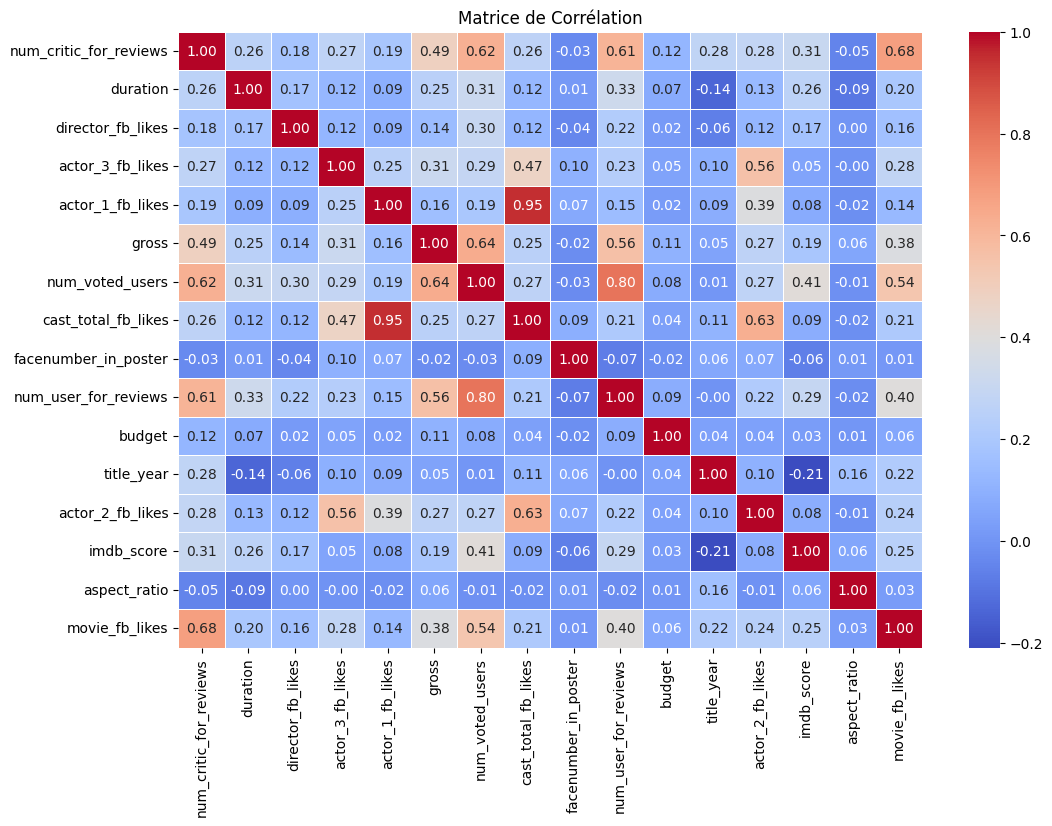

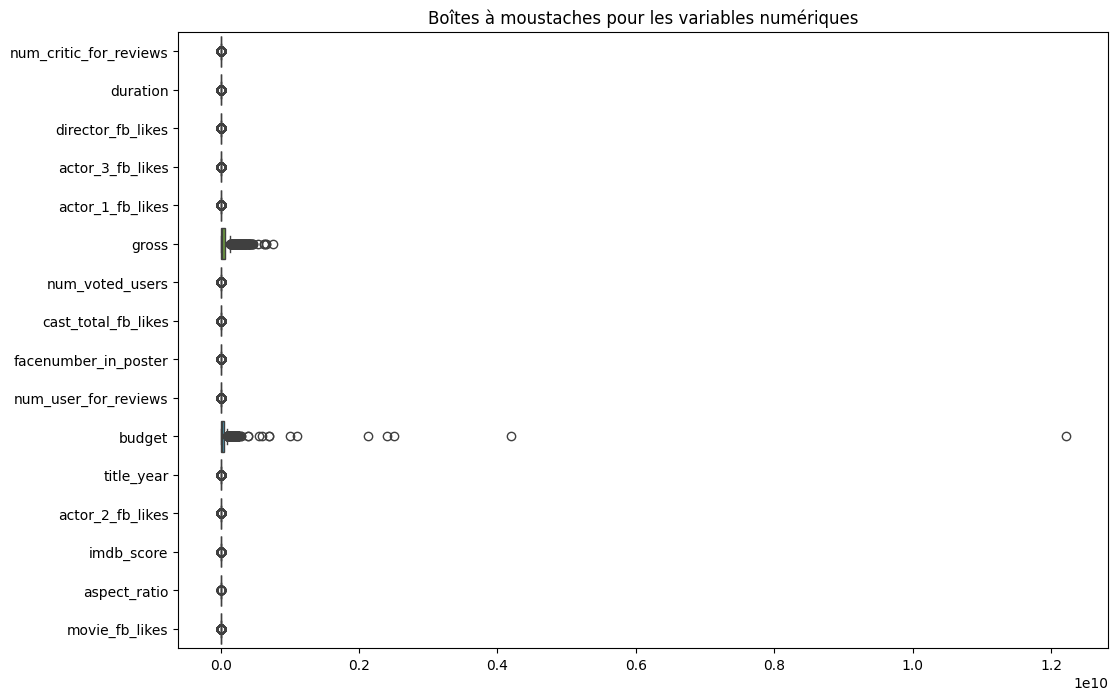

In [11]:
# Exclusion des colonnes non numériques
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcul de la matrice de corrélation
correlation_matrix = numeric_df.corr()

# Affichage du heatmap de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()

# Traçage des boxplots pour chaque variable numérique
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_df, orient="h")
plt.title('Boîtes à moustaches pour les variables numériques')
plt.show()

<h4>1.3. Nettoyage<h4>

In [12]:
# Copie du DataFrame d'origine dans un nouveau DataFrame 'df_cleaned'
df_cleaned = df.copy()

In [13]:
# Suppression des doublons
df_cleaned = df_cleaned.drop_duplicates()

# Supprimer les lignes vides des colonnes 'gross' et 'budget'
df_cleaned = df_cleaned.dropna(subset=['gross', 'budget'])

df_cleaned.shape # Pour info : 902 lignes supprimées

(4141, 28)

In [14]:
# Remplacement des valeurs manquantes dans les colonnes numériques par la médiane
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
#df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())
df_cleaned = df_cleaned.dropna(subset=numeric_cols)

# Remplacement des valeurs manquantes dans les colonnes de type objet par 'N/C'
object_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[object_cols] = df_cleaned[object_cols].fillna('N/C')

# Suppression des colonnes non exhaustives (suivant leurs corrélations et le choix de l'équipe)
df_cleaned = df_cleaned.drop(['color', 'duration', 'director_fb_likes', 'actor_3_fb_likes', 'actor_3_name', \
                            'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'language', 'country', \
                            'content_rating', 'budget', 'title_year', 'aspect_ratio'], axis=1, errors='ignore')

# Identification des valeurs manquantes pour validation
df_cleaned.isnull().sum()

director_name             0
num_critic_for_reviews    0
actor_2_name              0
actor_1_fb_likes          0
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
cast_total_fb_likes       0
num_user_for_reviews      0
actor_2_fb_likes          0
imdb_score                0
movie_fb_likes            0
dtype: int64

In [15]:
# Test get_dummies VS factorize => factorisation choisie

# genres_dummies = df_cleaned['genres'].str.get_dummies(sep='|')
# df_cleaned = pd.concat([df_cleaned, genres_dummies], axis=1)

# plot_keywords_dummies = df_cleaned['plot_keywords'].str.get_dummies(sep='|')
# df_cleaned = pd.concat([df_cleaned, plot_keywords_dummies], axis=1)

# df_cleaned = df_cleaned.drop(['plot_keywords', 'genres'], axis=1, errors='ignore')

# director_name_dummies = df_cleaned['director_name'].str.get_dummies(sep='|')
# df_cleaned = pd.concat([df_cleaned, director_name_dummies], axis=1)

# actor_2_name_dummies = df_cleaned['actor_2_name'].str.get_dummies(sep='|')
# df_cleaned = pd.concat([df_cleaned, actor_2_name_dummies], axis=1)

# actor_1_name_dummies = df_cleaned['actor_1_name'].str.get_dummies(sep='|')
# df_cleaned = pd.concat([df_cleaned, actor_1_name_dummies], axis=1)

# country_dummies = df_cleaned['country'].str.get_dummies(sep='|')
# df_cleaned = pd.concat([df_cleaned, country_dummies], axis=1)

# language_dummies = df_cleaned['language'].astype(str).str.get_dummies(sep='|')
# df_cleaned = pd.concat([df_cleaned, language_dummies], axis=1)

# df_cleaned = df_cleaned.drop(['director_name', 'actor_2_name', 'actor_1_name', 'country'], axis=1, errors='ignore')
# df_cleaned

In [16]:
# Factorisation des colonnes
df_cleaned['director_name_factorized'] = df_cleaned['director_name'].factorize()[0]
df_cleaned['actor_2_name_factorized'] = df_cleaned['actor_2_name'].factorize()[0]
df_cleaned['genres_factorized'] = df_cleaned['genres'].factorize()[0]
df_cleaned['actor_1_name_factorized'] = df_cleaned['actor_1_name'].factorize()[0]

# Suppression des colonnes d'origine
df_cleaned = df_cleaned.drop(['director_name', 'actor_2_name', 'genres', 'actor_1_name'], axis=1, errors='ignore')

In [17]:
# FORMATAGE DE LA COLONNE 'movie_title' AFIN DE L'UTILISER DANS UNE REQUETE URL

# Suppression des espaces vides au début et à la fin
df_cleaned['movie_title'] = df_cleaned['movie_title'].str.strip()

# Conversion en minuscules
df_cleaned['movie_title'] = df_cleaned['movie_title'].str.lower()

# Fonction de remplacement des caractères interdits
def replace_special_chars_with_underscore(text):
    special_chars = [' ', '!', '*', "'", '(', ')', ';', ':', '@', \
                    '&', '=', '+', '$', ',', '/', '?', '#', '[', ']', \
                    '%', '<', '>', '{', '}', '|', '\\', '^', '`', '~']
    for char in special_chars:
        text = text.replace(char, '_')
    # Remplacement de deux ou plus d'underscores consécutifs par un seul
    text = re.sub(r'_{2,}', '_', text)
    return text

# Appel de la fonction
df_cleaned['movie_title'] = df_cleaned['movie_title'].apply(replace_special_chars_with_underscore)

In [18]:
# Suppression des nouveaux doublons générés
print(df_cleaned['movie_title'].duplicated().sum())

df_cleaned.drop_duplicates(subset=['movie_title'], inplace=True)

df_cleaned.shape

76


(3940, 14)

In [19]:
# Affichage
df_cleaned

# Au final : suppression de 14 colonnes et 1103 lignes

num_critic_for_reviews  actor_1_fb_likes        gross  \
0                      723.0            1000.0  760505847.0   
1                      302.0           40000.0  309404152.0   
2                      602.0           11000.0  200074175.0   
3                      813.0           27000.0  448130642.0   
5                      462.0             640.0   73058679.0   
...                      ...               ...          ...   
5027                    64.0               5.0     673780.0   
5029                    78.0              89.0      94596.0   
5033                   143.0             291.0     424760.0   
5035                    56.0             121.0    2040920.0   
5042                    43.0              86.0      85222.0   

                                  movie_title  num_voted_users  \
0                                      avatar           886204   
1     pirates_of_the_caribbean_at_world_s_end           471220   
2                                     spectre           275868   
3                       the_dark_knight_rises          1144337   
5                                 john_carter           212204   
...                                       ...              ...   
5027                               the_circle             4555   
5029                                 the_cure             6318   
5033                                   primer            72639   
5035                              el_mariachi            52055   
5042                        my_date_with_drew             4285   

      cast_total_fb_likes  num_user_for_reviews  actor_2_fb_likes  imdb_score  \
0                    4834                3054.0             936.0         7.9   
1                   48350                1238.0            5000.0         7.1   
2                   11700                 994.0             393.0         6.8   
3                  106759                2701.0           23000.0         8.5   
5                    1873                 738.0             632.0         6.6   
...                   ...                   ...               ...         ...   
5027                    5                  26.0               0.0         7.5   
5029                  115                  50.0              13.0         7.4   
5033                  368                 371.0              45.0         7.0   
5035                  147                 130.0              20.0         6.9   
5042                  163                  84.0              23.0         6.6   

      movie_fb_likes  director_name_factorized  actor_2_name_factorized  \
0              33000                         0                        0   
1                  0                         1                        1   
2              85000                         2                        2   
3             164000                         3                        3   
5              24000                         4                        4   
...              ...                       ...                      ...   
5027             697                      1798                     2354   
5029             817                      1799                     2355   
5033           19000                      1800                     2356   
5035               0                       411                     2357   
5042             456                      1724                     2358   

      genres_factorized  actor_1_name_factorized  
0                     0                        0  
1                     1                        1  
2                     2                        2  
3                     3                        3  
5                     4                        4  
...                 ...                      ...  
5027                258                     1556  
5029                339                     1557  
5033                203                     1558  
5035                384                     1559  
5042                7

<h4>1.4. Enregistrement<h4>

In [20]:
# Enregistrement du dataset nettoyé dans un nouveau fichier csv
df_cleaned.to_csv("5000_movies_cleaned.csv", index=False)

<h3>2. Modélisation ML<h3>

<h4>2.1. Avec 'Régression linéaire'<h4>

In [21]:
# Sélection des caractéristiques pour le modèle, excluant 'movie_title'
X = df_cleaned.drop(['imdb_score', 'movie_title'], axis=1)
y = df_cleaned['imdb_score']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Évaluation du modèle
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE sur l'ensemble de test : {rmse:.4f}")

RMSE sur l'ensemble de test : 0.8913


In [22]:
# Enregistrement du modèle
model_filename = 'model_linear_regression.pkl'
joblib.dump(model, model_filename)

print(f"Le modèle a été enregistré sous le nom '{model_filename}'")

Le modèle a été enregistré sous le nom 'model_linear_regression.pkl'


In [23]:
### TEST DU MODELE DE REGRESSION LINEAIRE

# Chargement du modèle enregistré
model_filename = 'model_linear_regression.pkl'
model = joblib.load(model_filename)

# Chargement des données du film
movie_df = pd.read_csv('5000_movies_cleaned.csv')

# Suppression de la colonne cible
movie_df_without_score = movie_df.drop(['imdb_score'], axis=1)

# Conservation d'une copie du titre du film
movie_title = movie_df_without_score['movie_title']

# Suppression du titre du film du DataFrame avant la standardisation
movie_df_without_score = movie_df_without_score.drop('movie_title', axis=1)

# Standardisation des caractéristiques du film
scaler = StandardScaler()
movie_scaled = scaler.fit_transform(movie_df_without_score)

# Prédiction du score IMDB du film
imdb_score_pred = model.predict(movie_scaled)

# Affichage du titre du film et de la prédiction du score IMDB
print(f"Titre du film : {movie_title.values[10]}")
print(f"Prédiction du score IMDB : {imdb_score_pred[10]:.4f}")
print(f"Score d'origine IMDB : {movie_df['imdb_score'].iloc[10]:.4f}")

Titre du film : superman_returns
Prédiction du score IMDB : 6.3972
Score d'origine IMDB : 6.1000


<h4>2.2. Avec 'Random Forest'<h4>

In [24]:
# Copie du DataFrame 'df_cleaned' dans un nouveau DataFrame 'data'
data = df_cleaned.copy()

# Sélection des caractéristiques pertinentes et de la cible
X = data.drop(columns=['imdb_score', 'movie_title'])
y = data['imdb_score'] # target

# Division des données en 3 ensembles : 1 d'entraînement, 1 de validation et 1 de test :
# - 70% des données sont utilisées pour l'entraînement (X_train, y_train)
# - 15% des données sont utilisées pour la validation (X_val, y_val)
# - 15% des données sont utilisées pour le test final (X_test, y_test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialisation des modèles
models = {
    'Régression linéaire': LinearRegression(),
    'Arbre de décision': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Suppression des warnings
warnings.filterwarnings("ignore", category=FutureWarning, message="'squared' is deprecated")

# Initialisation des variables pour le meilleur modèle
best_rmse = float('inf')
best_model_name = None

# Entraînement et évaluation des modèles (boucle)
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    rmse_val = mean_squared_error(y_val, y_pred_val, squared=False) # Erreur quadratique moyenne
    mae_val = mean_absolute_error(y_val, y_pred_val)                # Erreur absolue moyenne
    r2_val = r2_score(y_val, y_pred_val)                            # Coefficient de détermination
    msle_val = mean_squared_log_error(y_val, y_pred_val)            # Erreur quadratique logarithmique moyenne
    
    print(f"{name} - Sur l'ensemble de validation :")
    print(f"    RMSE : {rmse_val}")
    print(f"    MAE : {mae_val}")
    print(f"    R² : {r2_val}")
    print(f"    MSLE : {msle_val}")

    # Mise à jour du meilleur modèle
    if rmse_val < best_rmse:
        best_rmse = rmse_val
        best_model_name = name

print(f"\nMeilleur modèle : {best_model_name}\n")

# Sélection du meilleur modèle
best_model = models[best_model_name]

# Évaluation finale sur l'ensemble de test
y_pred_test = best_model.predict(X_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
msle_test = mean_squared_log_error(y_test, y_pred_test)

print("Sur l'ensemble de test :")
print(f"    RMSE : {rmse_test}")
print(f"    MAE : {mae_test}")
print(f"    R² : {r2_test}")
print(f"    MSLE : {msle_test}")

# Évaluation sur l'ensemble d'entraînement
y_pred_train = best_model.predict(X_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
msle_train = mean_squared_log_error(y_train, y_pred_train)

print("Sur l'ensemble d'entraînement :")
print(f"    RMSE : {rmse_train}")
print(f"    MAE : {mae_train}")
print(f"    R² : {r2_train}")
print(f"    MSLE : {msle_train}")

Régression linéaire - Sur l'ensemble de validation :
    RMSE : 0.8584953532062332
    MAE : 0.6613213635986388
    R² : 0.2665211084981647
    MSLE : 0.016543692036768476
Arbre de décision - Sur l'ensemble de validation :
    RMSE : 1.11683017718454
    MAE : 0.8517766497461928
    R² : -0.24132643143948385
    MSLE : 0.029894786503494124
Random Forest - Sur l'ensemble de validation :
    RMSE : 0.7694028855797265
    MAE : 0.5849898477157361
    R² : 0.4108588693233792
    MSLE : 0.013705417955748065

Meilleur modèle : Random Forest

Sur l'ensemble de test :
    RMSE : 0.8076293220453372
    MAE : 0.5949932318104907
    R² : 0.4433532229044954
    MSLE : 0.014737035805104015
Sur l'ensemble d'entraînement :
    RMSE : 0.30484567417242275
    MAE : 0.2256065989847716
    R² : 0.919249604180799
    MSLE : 0.002688768771528977


In [25]:
# Entraînement du meilleur modèle (Random Forest dans ce cas)
best_model.fit(X_train, y_train)

# Enregistrement du modèle
model_filename = 'model_random_forest.pkl'
joblib.dump(best_model, model_filename)

print(f"Le modèle a été enregistré sous le nom '{model_filename}'")

Le modèle a été enregistré sous le nom 'model_random_forest.pkl'


In [26]:
# Chargement du modèle enregistré
model_filename = 'model_random_forest.pkl'
model = joblib.load(model_filename)

# Chargement des données du film
movie_df = pd.read_csv('5000_movies_cleaned.csv')

# Suppression de la colonne cible
movie_df_without_score = movie_df.drop(['imdb_score'], axis=1)

# Conservation d'une copie du titre du film
movie_title = movie_df_without_score['movie_title']

# Suppression du titre du film du DataFrame
movie_df_no_score = movie_df_without_score.drop('movie_title', axis=1)

# Prédiction du score IMDB du film sans standardisation
imdb_score_pred = model.predict(movie_df_no_score)

# Affichage du titre du film et de la prédiction du score IMDB
print(f"Titre du film : {movie_title.values[10]}")
print(f"Prédiction du score IMDB : {imdb_score_pred[10]:.4f}")
print(f"Score d'origine IMDB : {movie_df['imdb_score'].iloc[10]:.4f}")

Titre du film : superman_returns
Prédiction du score IMDB : 6.3040
Score d'origine IMDB : 6.1000
